<a href="https://colab.research.google.com/github/nssn96/ML_iris/blob/main/ML_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignmet 1 - Iris dataset

In [2]:
#import statements
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [3]:
#loading the iris dataset
iris_dataset=load_iris()
print(type(iris_dataset))

<class 'sklearn.utils.Bunch'>


In [4]:
#to explore the iris_dataset dictionary and understand the different available keys and thier values
print(iris_dataset.keys())
#print(iris_dataset.data)
print(iris_dataset.target)
print(iris_dataset.frame)
print(iris_dataset.target_names)
print(iris_dataset.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
None
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


From the above code snippet we can see that we have 

*   Four input features, which are sepal length, sepal width, petal length, petal width.
*   Three target names depending on the input features. The target names are : setosa=0, versicolor=1,virginica=2



In [5]:
#storing features and target of iris dataset separately
x = iris_dataset.data  # x is in matrix format
y=iris_dataset.target   # y is in a vector format

In [6]:
#to check the number/size of the data matrix
print(x.shape)

(150, 4)


So, from above code we can see that we have a total of 150 samples of input features

In [7]:
#converting to dataframe
data = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],columns= iris_dataset['feature_names'] + ['target'])
data['species'] = pd.Categorical.from_codes(iris_dataset.target,iris_dataset.target_names)
data.columns=['sepal_length','sepal_width','petal_length','petal_width','target','species']
data

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


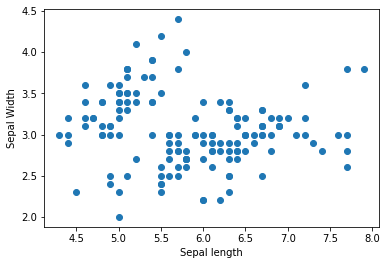

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data.sepal_length,data.sepal_width)
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()


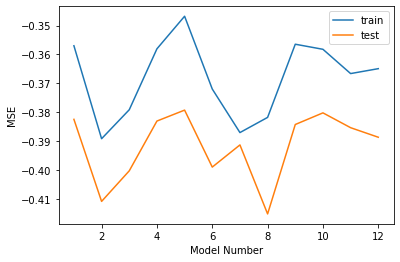

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# fitting the model with data set

# reg_sgd = SGDRegressor(loss='squared_error', max_iter=100)
# reg_sgd.fit(X,y)
# y_hat_pred = reg_sgd.predict(X_test)
backup = data

X_train,X_test,y_train,y_test = train_test_split(data.sepal_length.values.reshape(-1,1),data.sepal_width,test_size=0.1, random_state=10)

MSE_score_train = []
MSE_score_test = []

mod_no = range(1,13)
for i in mod_no:
  model = SGDRegressor(loss="squared_error", max_iter=100)
  model.fit(X_train, y_train)
  y_train_hat  = model.predict(X_train)
  y_test_hat  = model.predict(X_test)
  MSE_score_train.append(-1 * mean_squared_error(y_train,y_train_hat))
  MSE_score_test.append(-1 * mean_squared_error(y_test,y_test_hat))
    
plt.plot(mod_no,  MSE_score_train, label='train')
plt.plot(mod_no,  MSE_score_test, label='test')
plt.xlabel("Model Number")
plt.ylabel("MSE")
plt.legend()

# plt.annotate('Sweet Spot', xy = (9, -.005), xytext=(9, -.015),
#             arrowprops = dict(facecolor='black', shrink = 0.05));

In [13]:
y_train.shape

(135,)

In [14]:
X_train.shape

(135,)